In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('winequality')

In [ ]:
# number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [ ]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


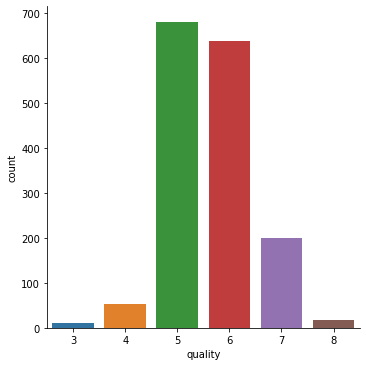

In [ ]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

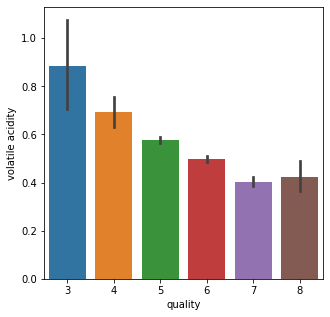

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

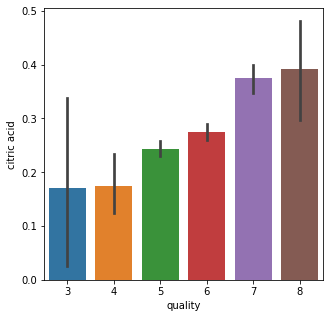

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

In [ ]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)

In [ ]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [ ]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [ ]:
#Random Forest Classifier
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.925


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
df = pd.read_csv('winequality.csv')

# Select relevant features
df = df[['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'pH', 'alcohol', 'quality']]

# Handle missing values
df.loc[:, 'fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].median())
df.loc[:, 'volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].median())
df.loc[:, 'citric acid'] = df['citric acid'].fillna(df['citric acid'].median())
df.loc[:, 'pH'] = df['pH'].fillna(df['pH'].median())

# Feature and target separation
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'pH', 'alcohol']]
y = df['quality']

# Identify and handle outliers using Interquartile Range (IQR)
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df.loc[:, column] = df[column].apply(lambda x: upper if x > upper else (lower if x < lower else x))

for col in X.columns:
    handle_outliers(X, col)

# Handle data imbalance using SMOTE with dynamically adjusted k_neighbors
counter = Counter(y)
minority_class = min(counter, key=counter.get)
minority_class_size = counter[minority_class]

# Ensure k_neighbors does not exceed the number of samples in the minority class
k_neighbors = min(5, minority_class_size - 1)
smote = SMOTE(random_state=0, k_neighbors=k_neighbors)
X, y = smote.fit_resample(X, y)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dimensionality reduction using Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

# Initialize and train linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict on the test set
y_pred = linreg.predict(X_test)

# Round predictions to the nearest integer for classification
y_pred_class = y_pred.round().astype(int)

# Print evaluation metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred_class))



In [ ]:
#Decision tree classifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
df = pd.read_csv('winequality.csv')

# Select relevant features
df = df[['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'pH', 'alcohol', 'quality']]

# Handle missing values
df.loc[:, 'fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].median())
df.loc[:, 'volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].median())
df.loc[:, 'citric acid'] = df['citric acid'].fillna(df['citric acid'].median())
df.loc[:, 'pH'] = df['pH'].fillna(df['pH'].median())

# Feature and target separation
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'pH', 'alcohol']]
y = df['quality']

# Identify and handle outliers using Interquartile Range (IQR)
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df.loc[:, column] = df[column].apply(lambda x: upper if x > upper else (lower if x < lower else x))

for col in X.columns:
    handle_outliers(X, col)

# Handle data imbalance using SMOTE with dynamically adjusted k_neighbors
counter = Counter(y)
minority_class = min(counter, key=counter.get)
minority_class_size = counter[minority_class]

# Ensure k_neighbors does not exceed the number of samples in the minority class
k_neighbors = min(5, minority_class_size - 1)
smote = SMOTE(random_state=0, k_neighbors=k_neighbors)
X, y = smote.fit_resample(X, y)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dimensionality reduction using Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

# Initialize and train Decision Tree model
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Print evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Building a Predictive System

In [ ]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine
